# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB


In [3]:
df = df.drop('pageviews', axis=1)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

Коэффициент силуэта: 0.45


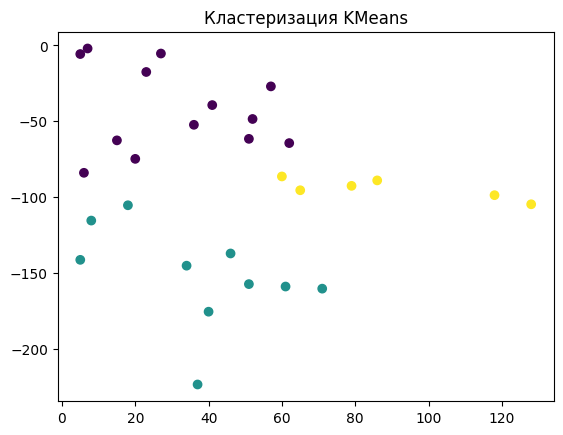

In [4]:
# KMeans — алгоритм кластеризации, который используется для разделения данных на группы (кластеры) на основе их схожести.

X = df[['num_commits', 'AVG(diff)']].values

km = KMeans(random_state=21, n_clusters=3)
km.fit(X)
labels = km.labels_
score = silhouette_score(X, labels)

# Коэффициент силуэта в кластеризации — это величина, которая позволяет оценить степень соответствия построенной кластерной структуры обучающим данным
print(f"Коэффициент силуэта: {score:.2f}")

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Кластеризация KMeans')
plt.show()

Коэффициент силуэта, clusters = 4: 0.42
Коэффициент силуэта, clusters = 6: 0.40
Коэффициент силуэта, clusters = 8: 0.49
Коэффициент силуэта, clusters = 10: 0.43


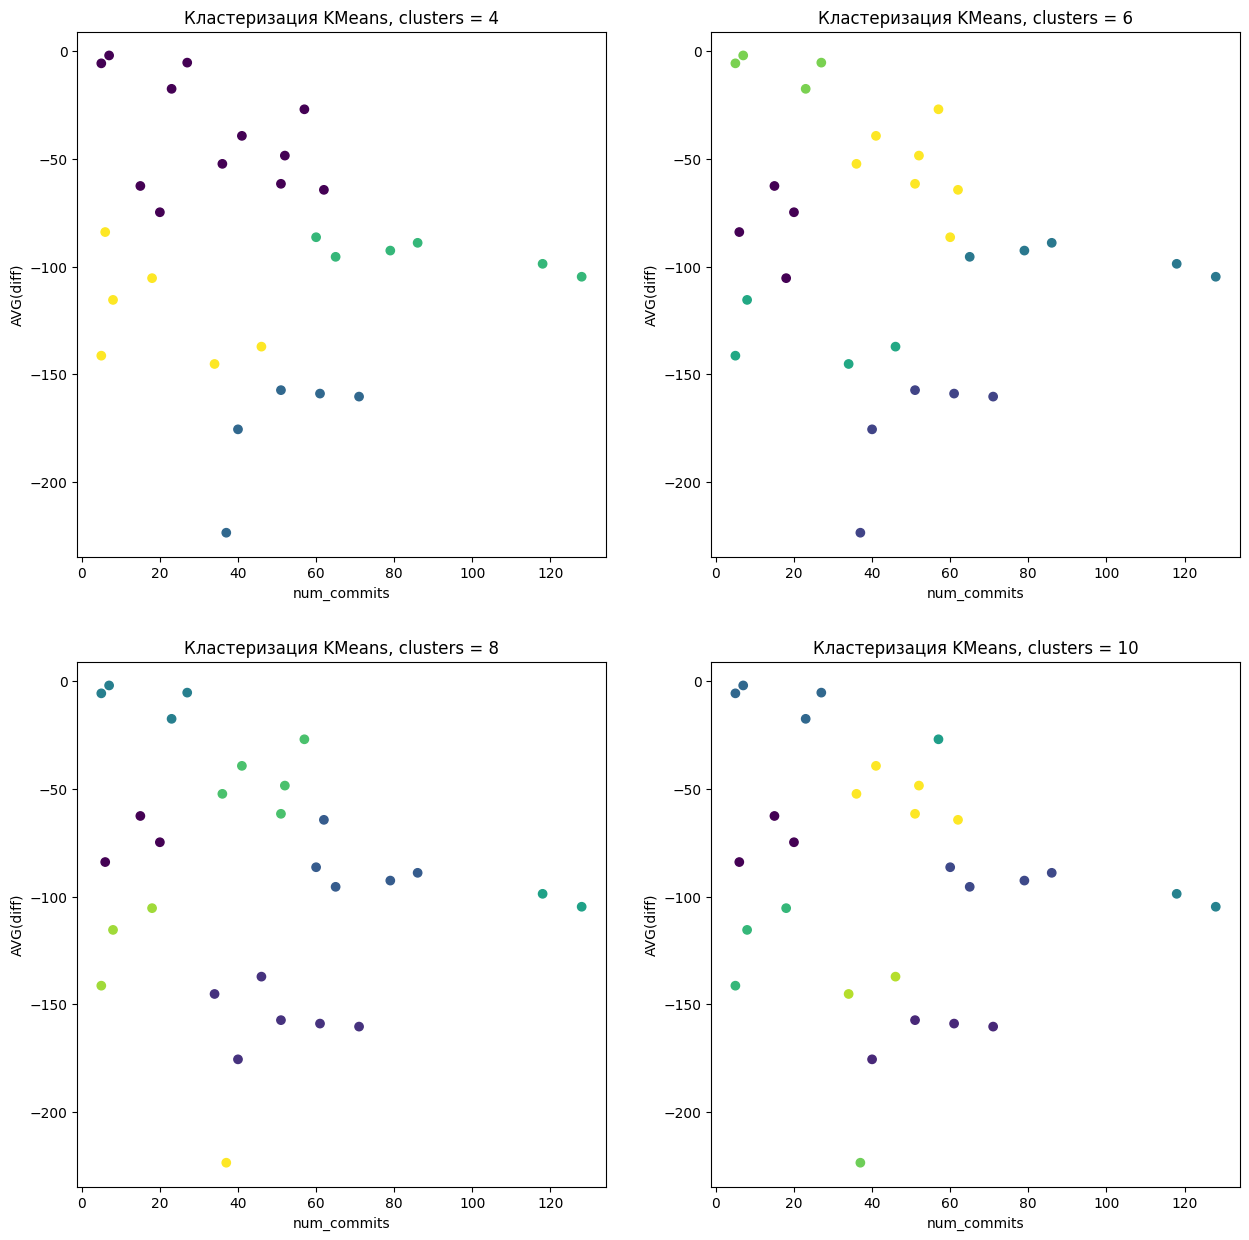

In [5]:
i = 1
plt.figure(figsize=(15, 15))

for cluster in range(4, 11, 2):
    
    km = KMeans(random_state=21, n_clusters=cluster)
    km.fit(X)
    labels = km.labels_
    
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'Кластеризация KMeans, clusters = {cluster}')
    i += 1
    
    print(f"Коэффициент силуэта, clusters = {cluster}: {silhouette_score(X, labels):.2f}")

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

Коэффициент силуэта: 0.38


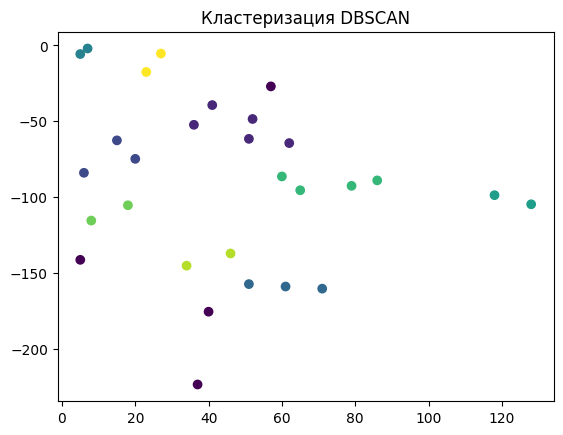

In [6]:
# DBSCAN — это алгоритм кластеризации, основанный на плотности
# eps (epsilon): Максимальное расстояние между двумя точками, чтобы они считались соседями
# min_samples: Минимальное количество точек в окрестности радиуса eps, чтобы точка считалась основной (core point)

dbs = DBSCAN(eps=20, min_samples=2)
dbs.fit(X)
labels = dbs.labels_

score = silhouette_score(X, labels)

print(f"Коэффициент силуэта: {score:.2f}")

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Кластеризация DBSCAN')
plt.show()

Коэффициент силуэта, min_samples= 2: 0.38
Коэффициент силуэта, min_samples= 3: 0.05
Коэффициент силуэта, min_samples= 4: -0.03
Коэффициент силуэта, min_samples= 5: -0.00


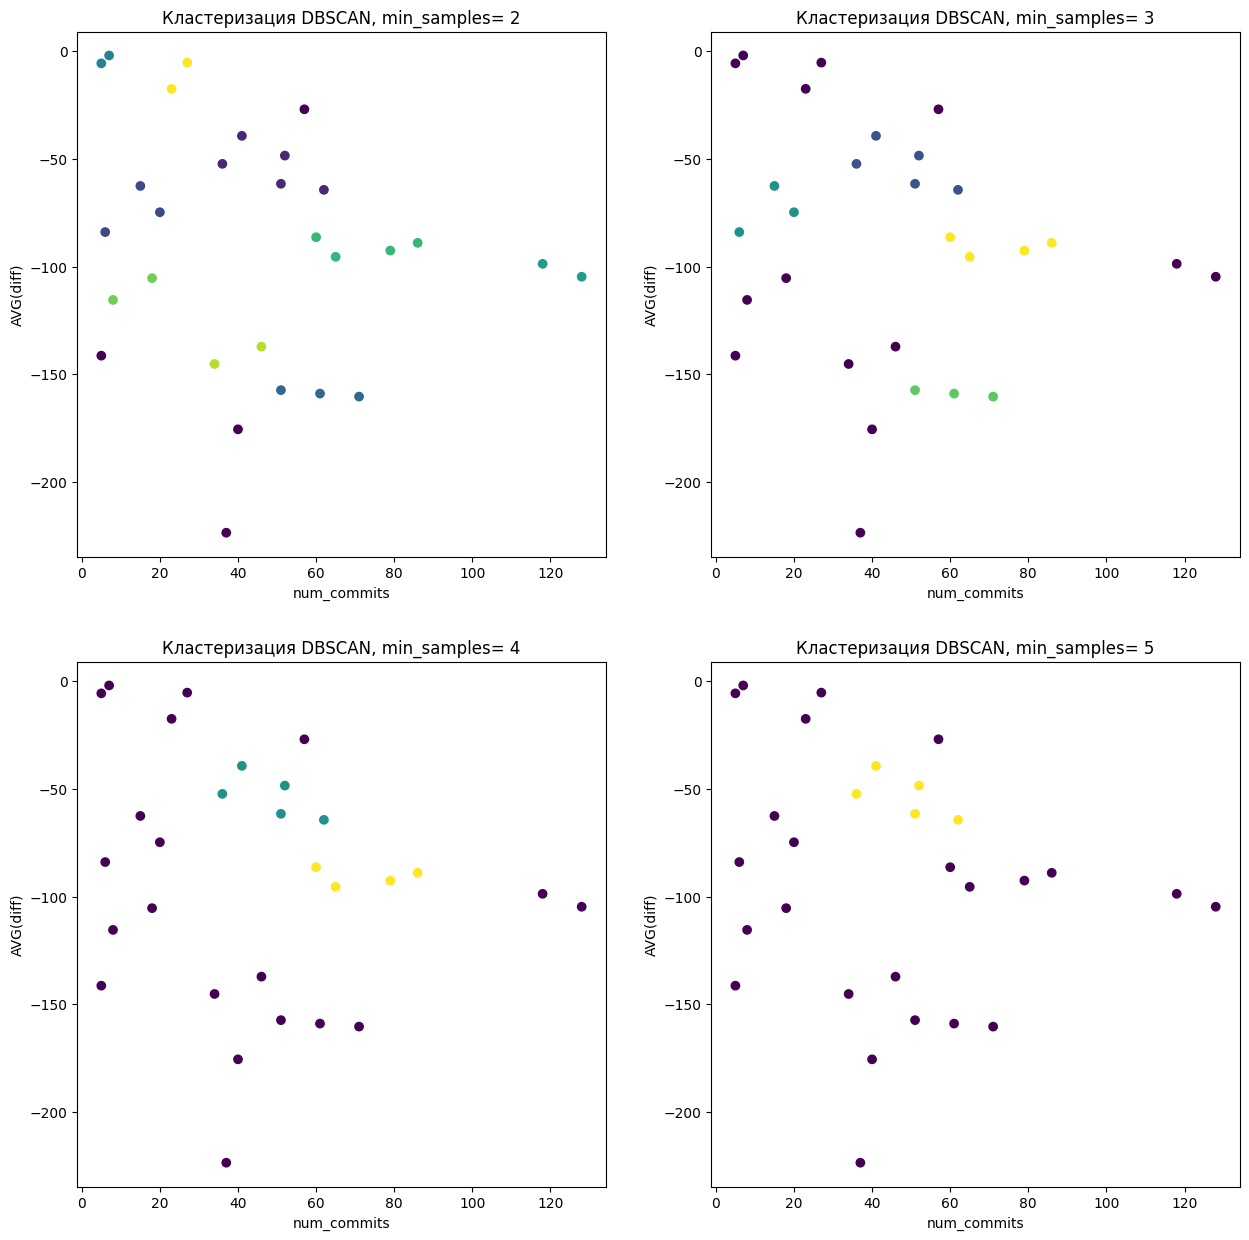

In [7]:
i = 1
plt.figure(figsize=(15, 15))

for j in range(2, 6):
    
    dbs = DBSCAN(eps=20, min_samples=j)
    dbs.fit(X)
    labels = dbs.labels_
    
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'Кластеризация DBSCAN, min_samples= {j}')
    i += 1
    
    print(f"Коэффициент силуэта, min_samples= {j}: {silhouette_score(X, labels):.2f}")

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

Коэффициент силуэта: 0.46


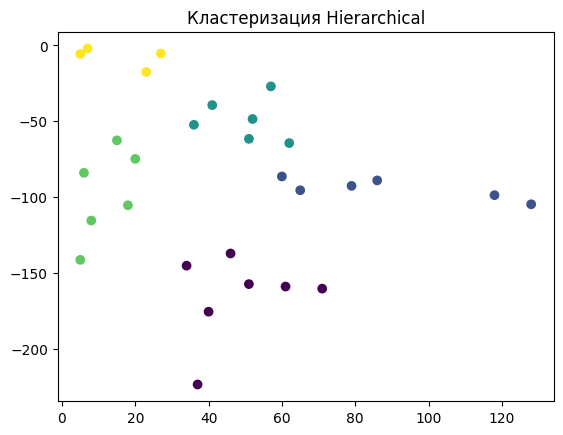

In [8]:
# Иерархическая кластеризация (Hierarchical Clustering) — это метод кластеризации, который строит иерархию кластеров, объединяя или разделяя их на основе расстояния между точками или кластерами.
# Каждая точка данных считается отдельным кластером.
# На каждом шаге два ближайших кластера объединяются в один

ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X)
labels = ac.labels_

score = silhouette_score(X, labels)

print(f"Коэффициент силуэта: {score:.2f}")

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('Кластеризация Hierarchical')
plt.show()

Коэффициент силуэта, n_clusters = 2: 0.36
Коэффициент силуэта, n_clusters = 3: 0.34
Коэффициент силуэта, n_clusters = 4: 0.44
Коэффициент силуэта, n_clusters = 5: 0.46


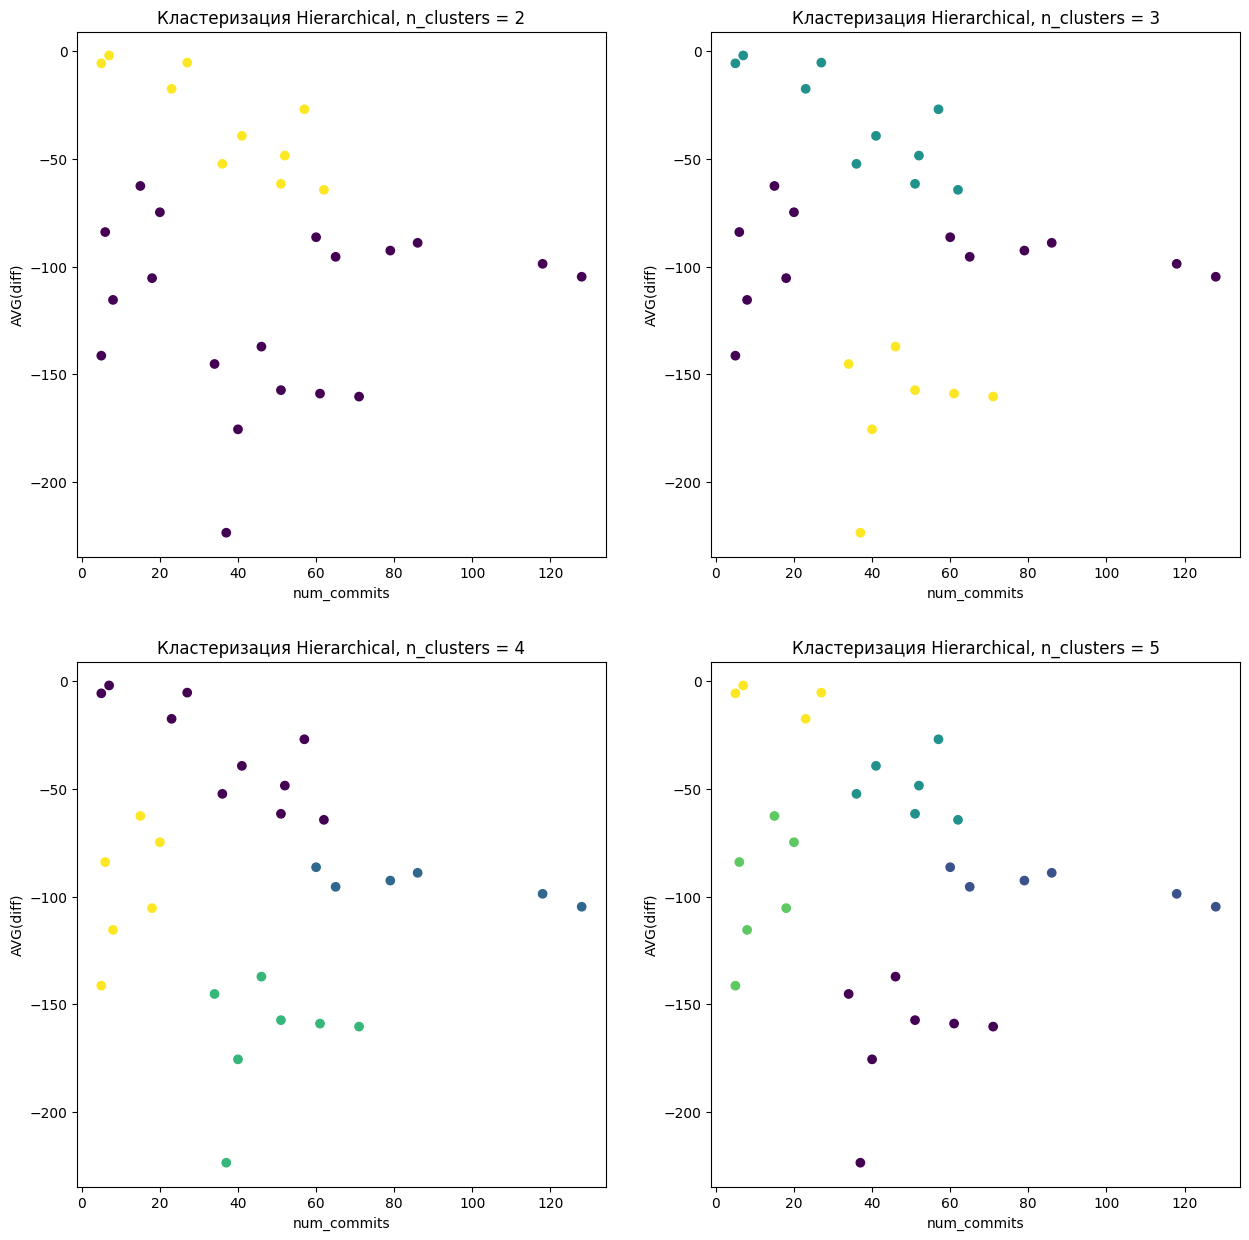

In [9]:
i = 1
plt.figure(figsize=(15, 15))

for j in range(2, 6):
    
    ac = AgglomerativeClustering(n_clusters=j)
    ac.fit(X)
    labels = ac.labels_
    
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'Кластеризация Hierarchical, n_clusters = {j}')
    i += 1
    
    print(f"Коэффициент силуэта, n_clusters = {j}: {silhouette_score(X, labels):.2f}")

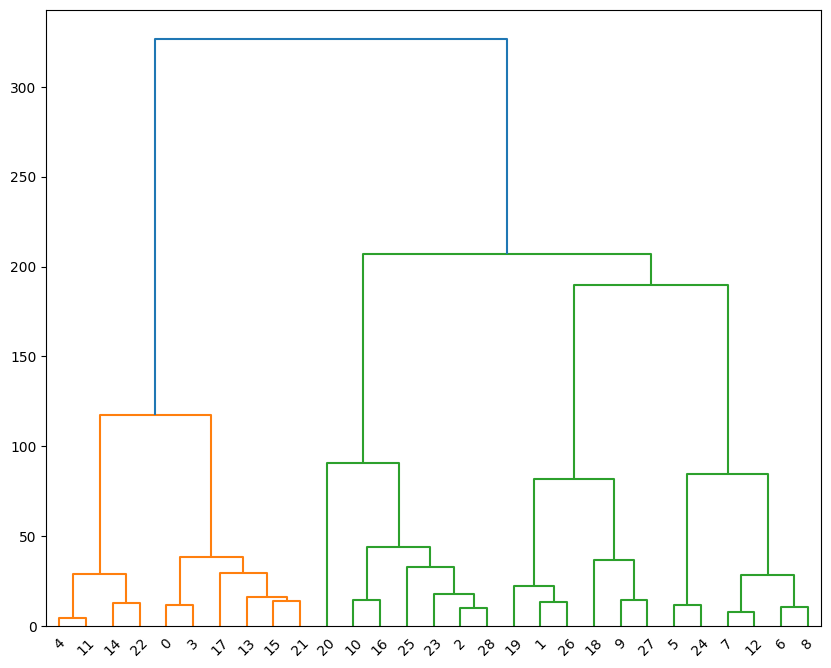

In [10]:
# Дендрограмма — это древовидная диаграмма, которая визуализирует иерархическую структуру кластеров, полученных в результате иерархической кластеризации

plt.figure(figsize=(10, 8))
Z = linkage(X, method='ward')
dendrogram(Z)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

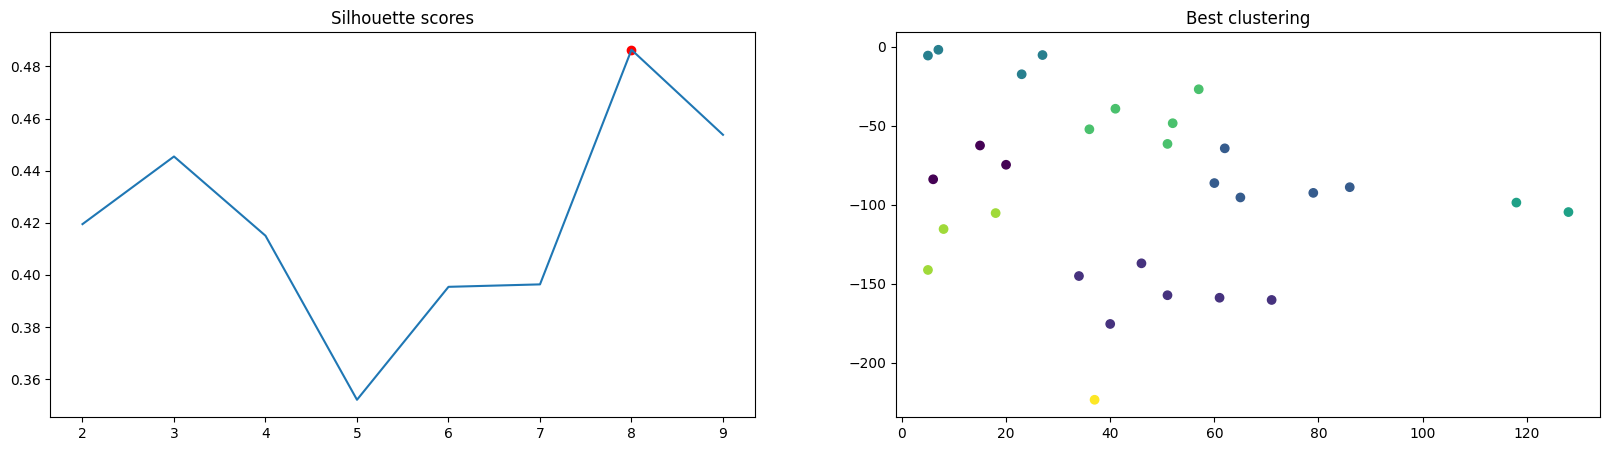

In [11]:
def optimize_and_visualize_clustering(model_class, params, param_name, param_range, data):

    scores = []
    best_score = -1
    best_value = None
    best_labels = None

    for value in param_range:
        params[param_name] = value
        model = model_class(**params)
        labels = model.fit_predict(data)

        score = silhouette_score(data, labels)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_labels = labels
            best_value = value


    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    
    plt.plot(param_range, scores)
    plt.scatter(best_value, best_score, color='red')
    plt.title('Silhouette scores')

    plt.subplot(1, 2, 2)
    plt.scatter(data[:, 0], data[:, 1], c=best_labels)
    plt.title('Best clustering')
    
    plt.show()


model_class = KMeans
params = {'random_state': 21}
param_name = 'n_clusters'
param_range = range(2, 10)
data = X

optimize_and_visualize_clustering(model_class, params, param_name, param_range, X)